<pre style='font-size :20px'><b>Reproducible Research for crimes datset</b></pre>
<pre style='font-size :15px'>
Name Surname
2020.02.08


<pre style='font-size :20px'><b>Synopsis</b></pre>
<pre style='font-size :15px'>The main aim of this notebook is going to be a very high-level Exploratory Data Analysis and Visualisation of the data.</pre>

<pre style='font-size : 18px'><b>Loading the data</b></pre>
<pre style='font-size : 15px;'>Firstly let's import necessary packages. </pre>

In [0]:
# modules we'll use
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [0]:
def load_data(file):
    url = 'https://raw.githubusercontent.com/HikkaV/VNTU-ML-Courses/master/assignments/data_science/files/{}'.format(file)
    try:
        df = pd.read_csv('../files/{}'.format(file))
    except:
        df = pd.read_csv(url)
    return df

In [0]:
# read in our data
crime = load_data('crime.csv')

# set seed for reproducibility
np.random.seed(0)

<pre style='font-size : 18px'><b>Results</b></pre>

In [26]:
crime.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,5/13/2015 23:53,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,5/13/2015 23:53,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,5/13/2015 23:33,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,5/13/2015 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [27]:
len(crime)

835

<pre style='font-size : 15px;'>It's quite a small and concise dataset but there should be quite a lot that can be done with regards to EDA on this.
So let's get started from the left to the right with the "Category" column.</pre>

<pre style='font-size : 18px'><b>Most common categories of crime committed:</b></pre>

In [28]:
crime.Category.value_counts()

LARCENY/THEFT                  223
NON-CRIMINAL                   102
OTHER OFFENSES                  98
ASSAULT                         60
VEHICLE THEFT                   54
VANDALISM                       40
BURGLARY                        39
SUSPICIOUS OCC                  35
MISSING PERSON                  27
WARRANTS                        26
DRUG/NARCOTIC                   15
ROBBERY                         14
SECONDARY CODES                 14
FRAUD                           14
PROSTITUTION                    13
TRESPASS                        11
WEAPON LAWS                     11
SEX OFFENSES FORCIBLE           10
DRUNKENNESS                      6
DRIVING UNDER THE INFLUENCE      5
KIDNAPPING                       4
ARSON                            3
STOLEN PROPERTY                  3
DISORDERLY CONDUCT               2
LIQUOR LAWS                      2
FORGERY/COUNTERFEITING           2
EMBEZZLEMENT                     1
BRIBERY                          1
Name: Category, dtyp

In [0]:
category = pd.DataFrame(list(zip(crime.Category.value_counts().index,crime.Category.value_counts())), columns=['Category','value'], index=None)

Text(0.5, 1, 'Catplot of the category of crime and number of occurences ')

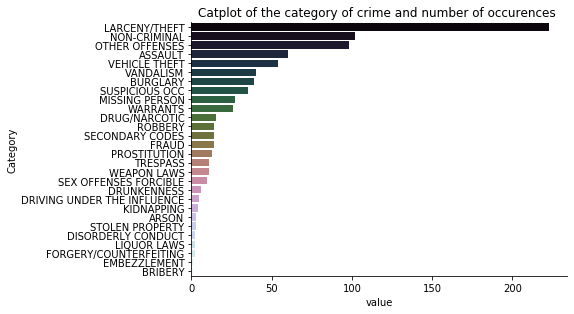

In [30]:
sns.catplot(x='value', y = 'Category', data=category, kind="bar", height=4.25, aspect=1.9, palette="cubehelix")
plt.title('Catplot of the category of crime and number of occurences ')

In [0]:
wordcloud = WordCloud(
                    stopwords=STOPWORDS,
                    background_color='black',
                    width=1200,
                    height=800
                    ).generate(" ".join(category['Category'].values))

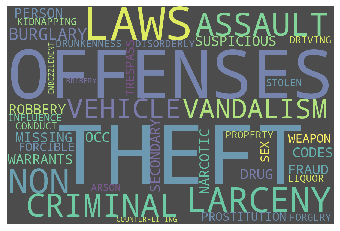

In [32]:
plt.imshow(wordcloud, alpha=0.7)
plt.axis('off')
plt.show()

<pre style='font-size : 15px;'>From all data visualizations result is the same: THEFT is most common crime in this dataset.</pre>

<pre style='font-size : 18px'><b>Most common crimes carried out per it's description:</b></pre>

In [33]:
crime.Descript.value_counts()

GRAND THEFT FROM LOCKED AUTO             76
STOLEN AUTOMOBILE                        30
PETTY THEFT OF PROPERTY                  30
AIDED CASE, MENTAL DISTURBED             30
BATTERY                                  22
                                         ..
ATTEMPTED GRAND THEFT PURSESNATCH         1
EMBEZZLED VEHICLE                         1
PROBATION VIOLATION, DV RELATED           1
ATTEMPTED THEFT FROM UNLOCKED VEHICLE     1
TRANSPORTATION OF MARIJUANA               1
Name: Descript, Length: 165, dtype: int64

<pre style='font-size : 15px;'>This column contains a lot more detailed information about the type of the crime committed.
And right-away we can observe that Grand Theft Auto is the most common crime description in this area.
Again, we create another dataframe which will make it convenient for the plotting.</pre>


In [0]:
descript = pd.DataFrame(list(zip(crime.Descript.value_counts().index,crime.Descript.value_counts())), columns=['Description','counts'], index=None)

In [0]:
descript_cloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1500,
                          height=1400
                         ).generate(" ".join(descript['Description'].values))

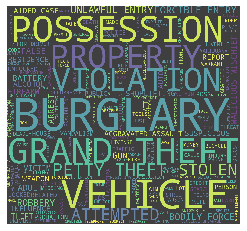

In [36]:
plt.imshow(descript_cloud,alpha=0.75)
plt.axis('off')
plt.show()

<pre style='font-size : 18px'><b>Day on which there is most crimes:</b></pre>

In [0]:
DOW = pd.DataFrame(list(zip(crime.DayOfWeek.value_counts(),crime.DayOfWeek.value_counts().index)), columns=['count','Day'], index=None)

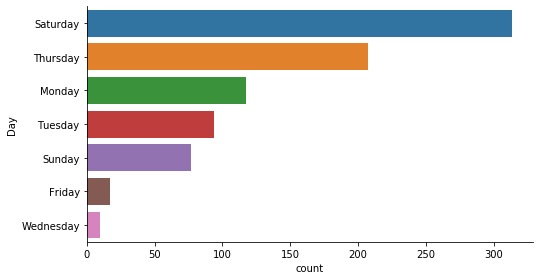

In [38]:
sns.catplot(x="count", y="Day", data = DOW, kind="bar", height=4, aspect=1.9)


<pre style='font-size : 15px'>Saturday is most dangerous day according to this dataset.</pre>

<pre style='font-size : 18px'><b>How good crimes are being resolved:</b></pre>

In [0]:
Resolution = pd.DataFrame(list(zip(crime.Resolution.value_counts().index,crime.Resolution.value_counts())), columns=['resolution','value'], index=None)

In [0]:
rescloud = WordCloud(
                    stopwords=STOPWORDS,
                    background_color='black',
                    width=1500,
                    height=1400
                    ).generate(" ".join(Resolution['resolution'].values))

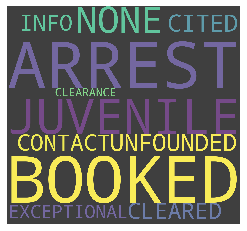

In [41]:
plt.imshow(rescloud, alpha=0.75)
plt.axis('off')
plt.show()

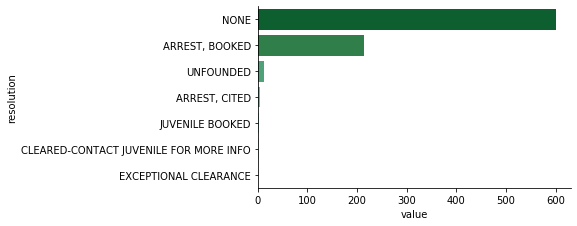

In [42]:
sns.catplot(x='value' , y = 'resolution', data=Resolution, kind="bar", height=3.25, aspect=2.5, palette='BuGn_r')

<pre style='font-size : 15px'>NONE means that most of crimes in this dataset are not resolved...</pre>



<pre style='font-size :25px; text-align: center'><b>SUMMARY</b></pre>

<pre style='font-size :15px'>We have performed multiple actions in order to test and understand crime dataset using charts, word cloud, basic dataframe transformations.
Even few simple steps discover many interesting facts regarding the data, for example most of crimes were not resolved, or information that most common crime is THEFT, etc...
And it's not a good idea to have a walk at Saturday.

</pre>
